# Описание проекта

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Нужно выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

# Откроем файлы с данными и изучим общую информацию

In [1]:
import pandas as pd
import numpy as np
games = pd.read_csv('/datasets/games.csv')
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [2]:
games.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
games.isna().sum() #выведем общее количество пропусков

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
games.duplicated().sum() #выведем общее количество дубликатов

0

In [7]:
len(games.query('User_Score == "tbd"')) #известно, что в столбце 'User_Score' есть некие значения 'tbd'. выведем их количество

2424

Таблица содержит 11 столбцов, информация в которых представлена следующими типами данных: float64(6), object(5). Каждая строка таблицы содержит исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.

Есть некоторые проблемы в данных:

- пропущенные значения;
- некорректные типы данных;
- некорректный формат данных.

# Подготовим данные

In [8]:
#приведем названия столбцов к нижнему регистру
games.columns = games.columns.str.lower()
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


обработаем столбец 'name'

In [9]:
games['name'].isna().sum() #выведем количество пропусков

2

In [10]:
games['name'] = games['name'].fillna('no_name') #заполним пропуски на 'no_name'
games['name'].isna().sum()

0

в столбце 'platform' проблем нет

обработаем столбец 'year_of_realease'

In [11]:
games['year_of_release'].isna().sum() #выведем количество пропусков

269

In [12]:
#доля пропусков составляет 1.6% - не критичное значение, можем не заполнять, т.к. наверняка не знаем точный год
#изменим тип данных на целочисленный
games['year_of_release'] = games['year_of_release'].astype('Int64')

подготовим столбец 'genre'

In [13]:
games['genre'].isna().sum()

2

In [14]:
games['genre'] = games['genre'].fillna('no_genre') #заполним пропуски на 'no_genre', т.к. мы не можем определить жанр наверняка
games['genre'].isna().sum()

0

обработаем столбец 'critic_score'

In [15]:
games['critic_score'].isna().sum() #выведем количество пропусков

8578

In [16]:
#заполнять пропуски на '0' не будем, т.к. есть реальные оценки '0'
games['critic_score'] = games['critic_score'].astype('Int64') #заменим тип данных на целочисленный
games['critic_score']

0         76
1        NaN
2         82
3         80
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: critic_score, Length: 16715, dtype: Int64

In [17]:
games['user_score'].isna().sum()

6701

In [18]:
games.isnull().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [19]:
len(games.query('user_score == "tbd"')) #вывыдем часть датасета с аббревиатурой 'tbd' в столбцах с рейтингом

2424

In [20]:
#'tbd' - 'to be determined' - 'будет определено'. соответственно, значений 'user_score' пока нет
#заменим значения 'tbd' на NaN
tbd = games['user_score'] != 'tbd'
games['user_score'].where(tbd, np.nan, inplace=True)
games['user_score'] = games['user_score'].astype('float64') #заменим тип данных на float

In [21]:
games.isnull().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

обработаем столбец 'rating'

In [22]:
games['rating'].isna().sum() #выведем количество пропусков

6766

In [23]:
#в столбце много пропусков, заполним их на 'no_rating', т.к. у нас недостаточно критериев, чтобы распределить рейтинг наверняка
games['rating'] = games['rating'].fillna('no_rating')
games['rating'].isna().sum()

0

проверим таблицу на наличие дубликатов

In [24]:
games.duplicated().sum() #дубликатов нет

0

In [25]:
#посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating,31.38


In [26]:
games['total_sales'] = games['total_sales'].astype(int) #заменим тип данных на целочисленный
games['total_sales']

0        82
1        40
2        35
3        32
4        31
         ..
16710     0
16711     0
16712     0
16713     0
16714     0
Name: total_sales, Length: 16715, dtype: int64

# Проведем исследовательский анализ данных

##### посмотрим, сколько игр выпускалось за разные годы

In [27]:
import matplotlib.pyplot as plt
ax = games['year_of_release'].plot(kind='hist', grid=True) #напишем условие для вывода гистограммы
plt.title('Распределение выпуска игр по годам')

Text(0.5, 1.0, 'Распределение выпуска игр по годам')

Скачок выпуска игр пришелся на десятилетие с 2002 по 2012 гг. В период с 2013 по 2016 гг. наблюдаем резкий спад выпуска. Кажется, до 2000-х годов эта индустрия была мало распространена, и, учитывая высокий скачок в развитии компьютерных технологий в рассматриваемый период, вероятнее всего предположить, что наиболее значимыми в рамках исследования будут данные за последнее десятилетие.

##### посмотрим, как менялись продажи по платформам

In [28]:
#сформируем сводную таблицу глобальных объёмов продаж для каждой платформы
sales_per_platform = games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False)
sales_per_platform

,total_sales
platform,
PS2,645
X360,588
Wii,563
PS3,528
DS,414
PS,384
GB,220
NES,211
PS4,205


[Text(0, 0.5, 'объём продаж'), Text(0.5, 0, 'платформа')]

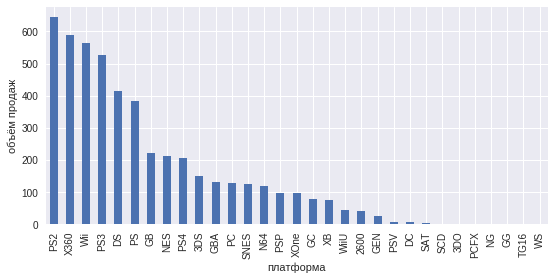

In [29]:
#выведем график распределения глобальных объёмов продаж для всех платформ
plt.style.use('seaborn')
sales_per_platform.plot(kind='bar', y='total_sales', figsize=(9,4), grid=True, legend=False).set(xlabel='платформа', ylabel='объём продаж')

In [30]:
#по глобальным объёмам продаж явно лидируют среди всей выборки 6 платформ, выделим их отдельно
top6 = sales_per_platform.head(6)
top6

,total_sales
platform,
PS2,645
X360,588
Wii,563
PS3,528
DS,414
PS,384


In [31]:
def total_sales_by_platform_years(name, df):
    return df.query('platform == @name').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)

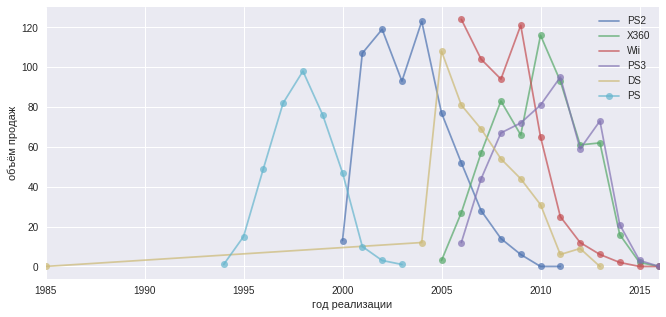

In [32]:
for platform in list(top6.index):
    total_sales_by_platform_years(platform, games)['total_sales'].plot(figsize=(11, 5), grid=True, style='o-', alpha=0.7, legend=True, label=platform).set(xlabel='год реализации', ylabel='объём продаж')

По графику видно, что жизненный цикл игровых платформ составляет в среднем около 10 лет.
<font color='blue'> Хорошо. </font>

##### выделим данные за актуальный период, которые будем использовать в дальнейшем для построения прогноза

In [33]:
games_actual = games.query('year_of_release > 2006') #сформируем датафрейм, в котором оставим только актуальные данные за последнее десятилетие
games_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28
13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80,7.7,E,22
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61,6.3,E,21


##### посмотрим, какие платформы лидируют по продажам, растут или падают

In [34]:
#выведем платформы в порядке уменьшения их объёмов продаж за актуальный период
sales_per_platform_actual = games_actual.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False)
sales_per_platform_actual

,total_sales
platform,
X360,556
PS3,515
Wii,429
DS,213
PS4,205
3DS,151
XOne,96
PC,58
PSP,49


[Text(0, 0.5, 'объём продаж'), Text(0.5, 0, 'платформа')]

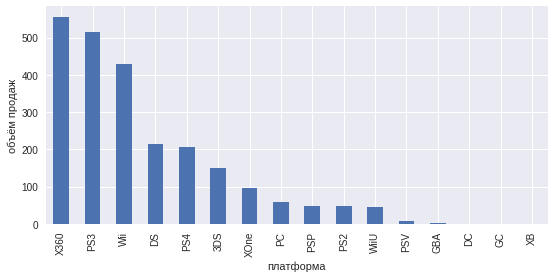

In [35]:
#выведем график соотношения объёмов продаж для разных платформ
sales_per_platform_actual.plot(kind='bar', y='total_sales', figsize=(9,4), grid=True, legend=False).set(xlabel='платформа', ylabel='объём продаж')

In [36]:
#определим 5 платформ актуального периода, лидирующих по объёмам продаж
top5_actual = sales_per_platform_actual.head(5)
top5_actual

,total_sales
platform,
X360,556
PS3,515
Wii,429
DS,213
PS4,205


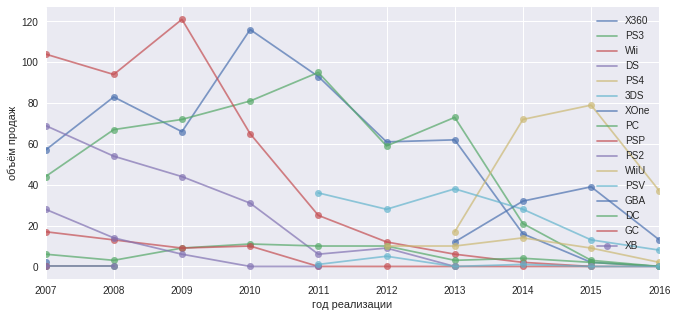

In [37]:
#выведем графики динамики объёмов продаж для разных платформ за актуальный период
for platform in list(sales_per_platform_actual.index):
    total_sales_by_platform_years(platform, games_actual)['total_sales'].plot(figsize=(11, 5), grid=True, style='o-', alpha=0.7, legend=True, label=platform).set(xlabel='год реализации', ylabel='объём продаж')

Лидируют по продажам платформы: PS3, X360, Wii, DS, PS4.

В целом к концу периода все платформы в той или иной степени демонстрируют падение объёмов продаж, при этом наиболее отрицательная динамика отмечаюется у платформ: Wii, DS, X360, PS3 - то есть, фактически, у лидеров за период. Похоже, десятилетие этих платформ подходит к концу.

PS4 и XOne - одни из самых молодых платформ на текущий момент - лидируют по объёмам продаж за текущй год (примерно 70 и 30 млн соответственно) и представляются наиболее перспективными и потенциально прибыльными.

#####  построим график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам

total_sales    AxesSubplot(0.125,0.536818;0.352273x0.343182)
dtype: object

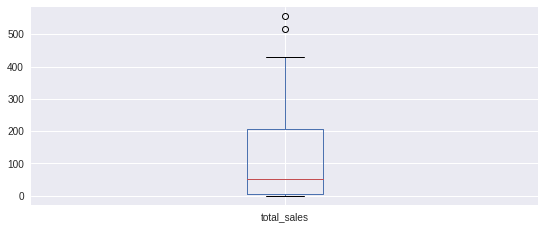

In [38]:
#построим диаграмму размаха глобальных продаж в целом
sales_per_platform_actual['total_sales'].plot(kind='box', subplots=True, grid=True, layout=(2, 2), figsize=(20,8)) #зададим параметры для диаграммы размаха

Средний объём глобальных продаж игр для платформы PS4: 51.25
Средний объём глобальных продаж игр для платформы XOne: 24.0


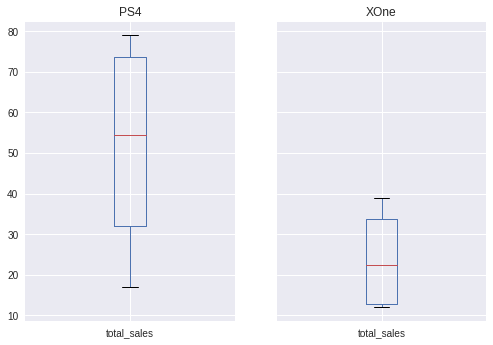

In [39]:
platforms = ['PS4', 'XOne']

fig, axs = plt.subplots(1, 2, sharey=True)

#построим графики продаж для каждой из платформ
for num, platform in enumerate(platforms):
    df = total_sales_by_platform_years(platform, games_actual)
    print(f"Средний объём глобальных продаж игр для платформы {platform}: {df['total_sales'].mean()}")
    df.boxplot('total_sales', ax=axs[num])
    axs[num].set_title(platform)

plt.subplots_adjust(left=0.1)

Средний объём глобальных продаж игр платформы PS4 более чем в 2 раза больше аналогичного показателя платформы XOne.

##### посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

In [40]:
PS4 = games_actual.query('platform == "PS4"') #сделаем срез данных для платформы PS4
XOne = games_actual.query('platform == "XOne"') #сделаем срез данных для платформы XOne
factors = ['user_score', 'critic_score', 'total_sales'] #выделим факторы, зависимость между которыми хотим выявить
PS4[factors].corr().round(2) #выведем матрицу корреляции для платформы PS4

,user_score,critic_score,total_sales
user_score,1.00,0.56,-0.03
critic_score,0.56,1.00,0.37
total_sales,-0.03,0.37,1.00


In [41]:
XOne[factors].corr().round(2) #выведем матрицу корреляции для платформы XOne

,user_score,critic_score,total_sales
user_score,1.00,0.47,-0.07
critic_score,0.47,1.00,0.37
total_sales,-0.07,0.37,1.00


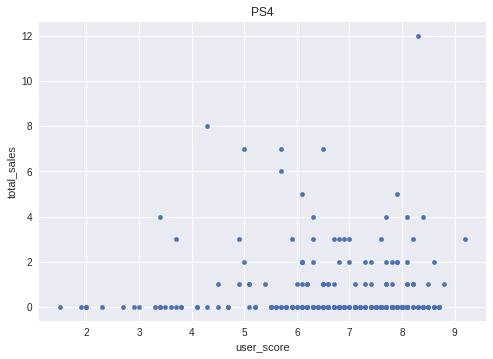

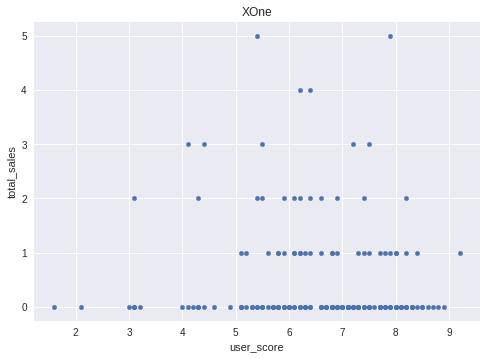

In [42]:
#построим диаграммы рассеяния, отражающие взаимосвязь 'user_score' и 'total_sales' для каждой из платформ
PS4.plot(kind='scatter', x='user_score', y='total_sales', title='PS4', grid=True)
XOne.plot(kind='scatter', x='user_score', y='total_sales', title='XOne', grid=True)

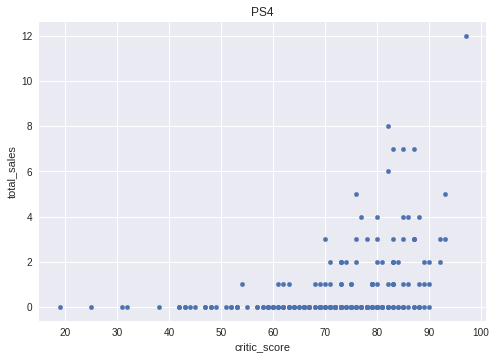

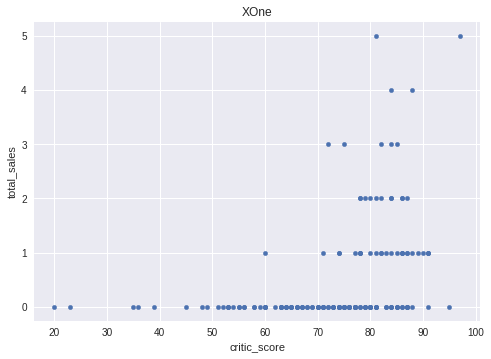

In [43]:
#построим диаграммы рассеяния, отражающие взаимосвязь 'critic_score' и 'total_sales' для каждой из платформ
PS4.plot(kind='scatter', x='critic_score', y='total_sales', title='PS4', grid=True)
XOne.plot(kind='scatter', x='critic_score', y='total_sales', title='XOne', grid=True)

Корреляции между оценками пользователей и объемом продаж нет. Есть незначительная корреляция между оценками пользователей и оценками критиков. При этом есть небольшая коррелляция между оценками критиков и объемом продаж.

Несмотря на то, что мы наблюдаем определенную зависимость объемов продаж от оценки критиков игр рассматриваемых популярных платформ, мы не можем сделать однозначный вывод о том, что уровень оценки критиков определяет спрос на игры любых платформ в целом. Наличие корреляции не опровергает причинно-следственную связь, как и не доказывает её.

##### посмотрим на общее распределение игр по жанрам

In [44]:
#выведем общее распределение выпущенных игр по жанрам за акутальный период
popular_genre = games_actual.groupby('genre').agg({'name':'count'}).sort_values(by='name', ascending=False).reset_index()
popular_genre

,genre,name
0,Action,2198
1,Misc,1145
2,Sports,1124
3,Adventure,952
4,Role-Playing,886
5,Shooter,668
6,Simulation,549
7,Racing,487
8,Fighting,358
9,Strategy,351


[Text(0, 0.5, 'объём продаж'), Text(0.5, 0, 'жанр')]

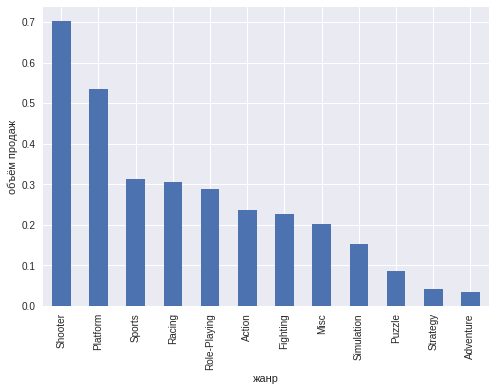

In [45]:
#выведем соотношение жанров и продаваемости игр за актуальный период
games_actual.pivot_table(index='genre', values='total_sales').sort_values('total_sales', ascending=False).plot(kind='bar', y='total_sales', legend=False, grid=True).set(xlabel='жанр', ylabel='объём продаж')

Наиболее популярными среди производителей являются игры жанра 'action'. При этом наиболее продаваемые - игры жанра 'shooter'. Игры 'platform' занимают второе место по продаваемости и последнее место по количеству их на рынке. Ситуация свидетельствует наличии несоответствия между спросом и предложением игр по жанрам.

# Составим портрет пользователя каждого региона

In [46]:
#напишем функцию для расчета пятерки наиболее популярных позиций по заданному критерию в регионе
def top_5_popular(column):
    return games_actual.groupby(column).agg({region: 'sum'}).sort_values(region, ascending=False).head(5)

#напишем функцию для вывода диаграммы
def pie(df):
    return df.plot(kind='pie', y=region, legend=False)

#### North America

In [47]:
region = 'na_sales'

#####  топ-5 популярных платформ

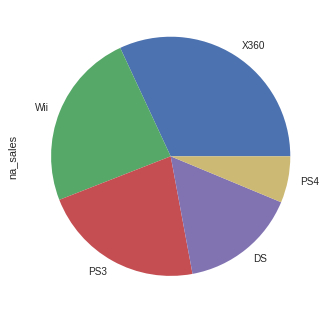

In [48]:
pie(top_5_popular('platform'))

##### топ-5 популярных жанров

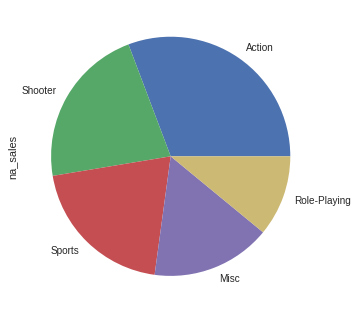

In [49]:
pie(top_5_popular('genre'))

##### влияние рейтинга ESRB на продажи в регионе

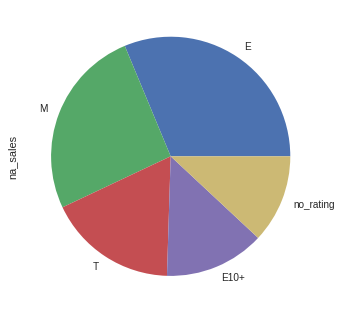

In [50]:
pie(top_5_popular('rating'))

#### Europe

In [51]:
region = 'eu_sales'

#####  топ-5 популярных платформ

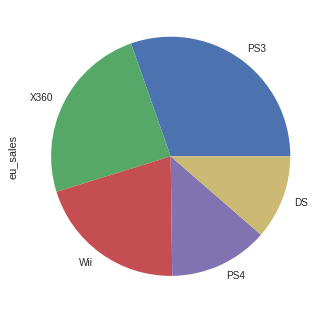

In [52]:
pie(top_5_popular('platform'))

#####  топ-5 популярных жанров

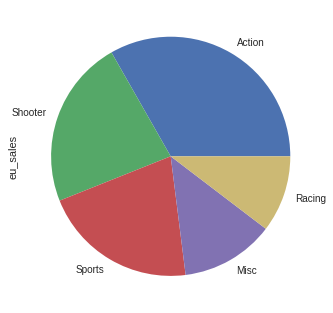

In [53]:
pie(top_5_popular('genre'))

##### влияние рейтинга ESRB на продажи в регионе

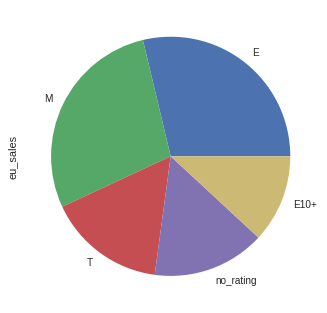

In [54]:
pie(top_5_popular('rating'))

#### Japan

In [55]:
region = 'jp_sales'

##### топ-5 популярных платформ

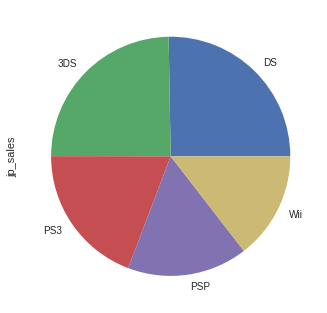

In [56]:
pie(top_5_popular('platform'))

##### топ-5 популярных жанров

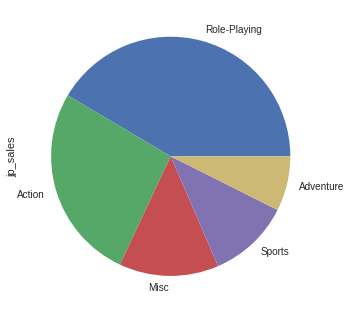

In [57]:
pie(top_5_popular('genre'))

##### влияние рейтинга ESRB на продажи в регионе

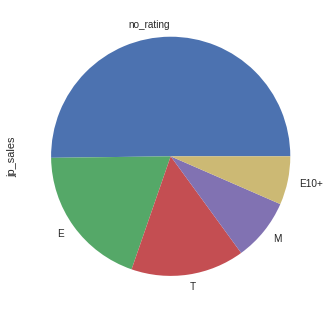

In [58]:
pie(top_5_popular('rating'))

# Проверим гипотезы

##### Cредние пользовательские рейтинги платформ Xbox One и PC одинаковые

- Нулевая гипотеза H0: cредние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Альтернативная гипотеза Н1: cредние пользовательские рейтинги платформ Xbox One и PC не одинаковые.

In [59]:
#используем ttest для проверки гипотезы о равенстве средних пользовательских рейтингов платформ Xbox One и PC
from scipy import stats as st

XOne = games_actual.query('platform == "XOne"')
PC = games_actual.query('platform == "PC"')

alpha = 0.03 #установим критический уровень статистическрой значимости 3%

results = st.ttest_ind(XOne['user_score'], PC['user_score'], nan_policy ='omit')

print('p-значение', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение 0.05554752084309758
Не получилось отвергнуть нулевую гипотезу


In [60]:
XOne['user_score'].mean().round()

7.0

In [61]:
PC['user_score'].mean().round()

7.0

Результат свидетельствует, что cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.

##### Средние пользовательские рейтинги жанров Action и Sports разные

- Нулевая гипотеза H0: cредние пользовательские рейтинги жанров Action и Sports одинаковые;
- Альтернативная гипотеза Н1: Средние пользовательские рейтинги жанров Action и Sports разные.

In [62]:
#используем ttest для проверки гипотезы о равенстве средних пользовательских рейтингов жанров Action и Sports

Action = games_actual.query('genre == "Action"')
Sports = games_actual.query('genre == "Sports"')

alpha = 0.03 #установим критический уровень статистическрой значимости 5%

results = st.ttest_ind(Action['user_score'], Sports['user_score'], nan_policy ='omit')

print('p-значение', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение 1.089451491957169e-12
Отвергаем нулевую гипотезу


In [63]:
Action['user_score'].mean().round()

7.0

In [64]:
Sports['user_score'].mean().round()

6.0

Результат свидетельствует, что cредние пользовательские рейтинги жанров Action и Sports разные.

# Выводы

В результате проведенного анализа можно заключить, что жизненный цикл игровой платформы составляет в среднем 10 лет.

Наиболее популярными среди производителей являются игры жанра 'action'. При этом наиболее продаваемые - игры жанра 'shooter'. Игры 'platform' занимают второе место по продаваемости и последнее место по количеству их на рынке. Ситуация свидетельствует наличии несоответствия между спросом и предложением игр по жанрам.

На примере анализа самых популярных платформ можно сделать вывод, что корреляции между оценками пользователей и объёмом продаж нет. Есть незначительная корреляция между оценками пользователей и оценками критиков. При этом есть небольшая коррелляция между оценками критиков и объёмом продаж.

Отдельно можно выделить некоторые отличия между регионами.
Для Северной Америки характерны следующие показатели:
- самые популярные платформы: X360, Wii, PS3, DS, PS4;
- самые популярные жанры: action, shooter, sports, misc, role-playing;
- влияние ли рейтинг ESRB на продажи: E, M, T, E10+, no_rating.

Для Европы характерны следующие показатели:
- самые популярные платформы: PS3, X360, Wii, PS4, DS;
- самые популярные жанры: action, shooter, sports, misc, racing;
- влияние ли рейтинг ESRB на продажи: E, M, T, no_rating, E10+.

Для Японии характерны следующие показатели:
- самые популярные платформы: DS, 3DS, PS3, PSP, Wii;
- самые популярные жанры: role-playing, actions, misc, sports, adventure;
- влияние ли рейтинг ESRB на продажи: no_rating, E, T, M, E10+.

Портреты пользователей Северной Америки и Европы имеют много общего, чего не скажешь о Японии: предпочтения пользователей там сильно отличаются.

В ходе исследования были подтверждены две выдвинутые гипотезы:
- средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- средние пользовательские рейтинги жанров Action и Smart разные.